In [17]:
# SAMEERATU ISSAH
# 4296820


In [25]:
import numpy as np
import matplotlib.pyplot as plt


In [26]:
# Sample observational data (in degrees Celsius)
observations = np.array([15.2, 16.1, 14.5, 15.8, 25.0])

# Sample model predictions (in degrees Celsius)
model_output = np.array([14.8, 15.5, 14.0, 16.0, 25.3])

In [27]:
# Function to perform Optimal Interpolation
def optimal_interpolation(obs, model, obs_error_var, model_error_var):
    # Compute the Kalman gain
    kalman_gain = model_error_var / (model_error_var + obs_error_var)
    
    # Compute the analysis
    analysis = model + kalman_gain * (obs - model)
    
    return analysis

# Assumed Error variances 
obs_error_variance = 1.0
model_error_variance = 2.0

# Performing Optimal Interpolation
analysis = optimal_interpolation(observations, model_output, obs_error_variance, model_error_variance)

# Function to calculate RMSE
def calculate_rmse(a, b):
    return np.sqrt(np.mean((a - b) ** 2))

# Function to calculate bias
def calculate_bias(a, b):
    return np.mean(a - b)



In [31]:
#Comparing the analysis with the original observational data and the NWP model output.

# RMSE and Bias for analysis vs observations
rmse_analysis_obs = rmse(analysis, observations)
bias_analysis_obs = bias(analysis, observations)

# RMSE and Bias for analysis vs model output
rmse_analysis_model = rmse(analysis, model_output)
bias_analysis_model = bias(analysis, model_output)

# RMSE and Bias for model output vs observations
rmse_model_obs = rmse(model_output, observations)
bias_model_obs = bias(model_output, observations)# Print results
print("Analysis:", analysis)
print("RMSE (Analysis vs Observations):", rmse_analysis_obs)
print("Bias (Analysis vs Observations):", bias_analysis_obs)
print("RMSE (Analysis vs Model Output):", rmse_analysis_model)
print("Bias (Analysis vs Model Output):", bias_analysis_model)
print("RMSE (Model Output vs Observations):", rmse_model_obs)
print("Bias (Model Output vs Observations):", bias_model_obs)



Analysis: [15.06666667 15.9        14.33333333 15.86666667 25.1       ]
RMSE (Analysis vs Observations): 0.14142135623730975
Bias (Analysis vs Observations): -0.06666666666666643
RMSE (Analysis vs Model Output): 0.2828427124746189
Bias (Analysis vs Model Output): 0.13333333333333358
RMSE (Model Output vs Observations): 0.4242640687119287
Bias (Model Output vs Observations): -0.2


In [29]:
# Printing the statistical metrics
print(f"RMSE (Model): {rmse_model:.2f}")
print(f"RMSE (Analysis): {rmse_analysis:.2f}")
print(f"Bias (Model): {bias_model:.2f}")
print(f"Bias (Analysis): {bias_analysis:.2f}")


RMSE (Model): 0.42
RMSE (Analysis): 0.14
Bias (Model): 0.20
Bias (Analysis): 0.07


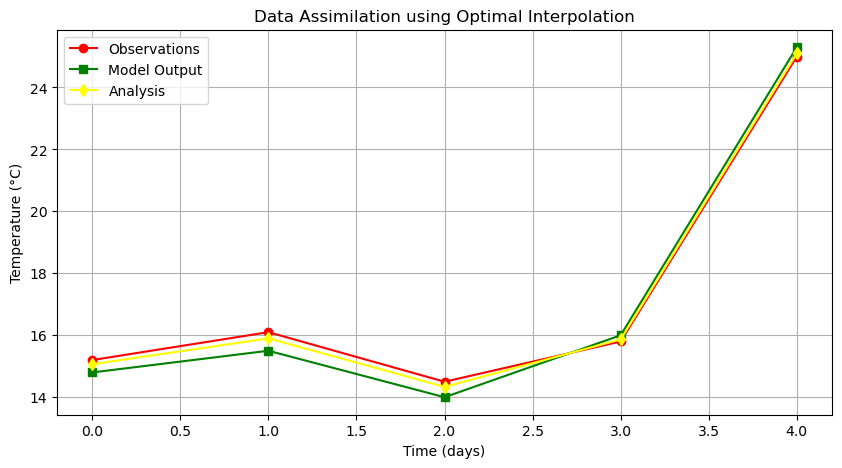

In [30]:
# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(observations, 'o-', label='Observations', color='red')
plt.plot(model_output, 's-', label='Model Output', color='green')
plt.plot(analysis, 'd-', label='Analysis', color='yellow')
plt.xlabel('Time (days)')
plt.ylabel('Temperature (°C)')
plt.title('Data Assimilation using Optimal Interpolation')
plt.legend()
plt.grid(True)
plt.show()